<a href="https://colab.research.google.com/github/sgevatschnaider/Grafos/blob/main/Hipergrafo_y_ciclo_hamiltoneano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from IPython.display import display, HTML

# Definir el contenido HTML con el texto proporcionado
html_content = """
<h1>Hipercubos y Ciclos Hamiltonianos en la Teoría de Grafos</h1>

<p>
Un <strong>hipercubo</strong> es una generalización del concepto de un cubo a dimensiones superiores. En geometría, un cubo es una figura tridimensional con seis caras cuadradas iguales. Al extender este concepto a dimensiones superiores, obtenemos el hipercubo de dimensión <em>n</em>, también conocido como <em>n-cubo</em>. Por ejemplo, un hipercubo de dimensión 3 tiene 8 vértices y 12 aristas, formando la estructura de un cubo común.
</p>

<p>
En teoría de grafos, un hipercubo puede representarse como un grafo donde cada nodo corresponde a un vértice del hipercubo, y las aristas conectan nodos que difieren en exactamente una coordenada. En un hipercubo de dimensión 3, los nodos pueden representarse como cadenas binarias de longitud 3, y dos nodos están conectados si sus cadenas binarias difieren en un solo bit.
</p>

<h2>Ciclo Hamiltoniano</h2>

<p>
Un <strong>ciclo Hamiltoniano</strong> es un ciclo en un grafo que visita cada nodo exactamente una vez y regresa al nodo inicial. Este concepto es fundamental en la teoría de grafos y tiene aplicaciones en problemas como el <em>Problema del Viajante de Comercio</em>.
</p>

<h2>Problema del Viajante de Comercio (TSP)</h2>

<p>
El <strong>Problema del Viajante de Comercio</strong> (TSP por sus siglas en inglés) es un problema clásico de optimización combinatoria. Plantea lo siguiente: dado un conjunto de ciudades y las distancias entre cada par de ellas, ¿cuál es la ruta más corta posible que visite cada ciudad exactamente una vez y regrese a la ciudad de origen? Este problema es conocido por ser <em>NP-difícil</em>, lo que significa que no se conoce un algoritmo eficiente que lo resuelva para todos los casos.
</p>

<p>
Encontrar un ciclo Hamiltoniano en un grafo es una simplificación del Problema del Viajante de Comercio. Mientras que el TSP busca el ciclo Hamiltoniano de costo mínimo en un grafo ponderado (donde las aristas tienen pesos o costos asociados), el problema de encontrar un ciclo Hamiltoniano simplemente busca determinar si existe un ciclo que visite todos los nodos exactamente una vez en un grafo no ponderado.
</p>

<h2>Método de Fuerza Bruta para Encontrar Ciclos Hamiltonianos</h2>

<p>
Uno de los métodos para encontrar un ciclo Hamiltoniano es el método de fuerza bruta. Este enfoque implica generar todas las posibles permutaciones de los nodos del grafo y verificar si alguna de estas permutaciones forma un ciclo válido. Aunque este método garantiza encontrar un ciclo Hamiltoniano si existe, es computacionalmente intensivo y se vuelve impráctico para grafos de gran tamaño debido a que el número de permutaciones posibles crece factorialmente con el número de nodos.
</p>

<p>
En el caso del hipercubo de dimensión 3, que tiene solo 8 nodos, el método de fuerza bruta es viable y permite encontrar todos los ciclos Hamiltonianos posibles. Al aplicar este método:
</p>

<ul>
    <li>Generamos todas las permutaciones de los nodos, fijando uno como punto de inicio para reducir redundancias.</li>
    <li>Verificamos cada permutación para determinar si forma un ciclo válido, es decir, si cada par consecutivo de nodos en la permutación está conectado por una arista en el grafo.</li>
    <li>Registramos los ciclos válidos encontrados durante el proceso.</li>
</ul>

<p>
Este enfoque nos permite visualizar y entender la estructura de ciclos Hamiltonianos en el hipercubo, y es especialmente útil para fines educativos y de demostración en grafos pequeños.
</p>

<p>
Encontrar un ciclo Hamiltoniano en un hipercubo es una simplificación del Problema del Viajante de Comercio, donde no nos preocupamos por minimizar distancias o costos, sino simplemente por la existencia de un ciclo que recorra todos los nodos. El método de fuerza bruta, aunque ineficiente para grafos grandes, es efectivo en grafos pequeños y nos brinda una comprensión profunda de la estructura y propiedades del grafo.
</p>
"""

# Mostrar el contenido HTML en el cuaderno de Colab
display(HTML(html_content))


In [3]:
# Paso 1: Importar las bibliotecas necesarias
import networkx as nx
import matplotlib.pyplot as plt
from itertools import permutations
import time
from matplotlib import animation
from IPython.display import HTML
import numpy as np

# Paso 2: Crear el grafo cúbico
G = nx.Graph()

# Definir los vértices (cadenas binarias de longitud 3)
V = ['000', '001', '010', '011', '100', '101', '110', '111']
G.add_nodes_from(V)

# Definir las aristas (diferencia en una posición)
E = [('000', '001'), ('000', '010'), ('000', '100'),
     ('001', '011'), ('001', '101'),
     ('010', '011'), ('010', '110'),
     ('100', '101'), ('100', '110'),
     ('011', '111'), ('101', '111'), ('110', '111')]
G.add_edges_from(E)

# Generar posiciones para un dibujo en 3D
pos_3d = {
    '000': (0, 0, 0),
    '001': (0, 0, 1),
    '010': (0, 1, 0),
    '011': (0, 1, 1),
    '100': (1, 0, 0),
    '101': (1, 0, 1),
    '110': (1, 1, 0),
    '111': (1, 1, 1)
}

# Crear la figura y el eje 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Función para dibujar el grafo cúbico
def draw_cube(ax, G, pos, highlighted_edges=None, angle=0):
    ax.clear()
    # Establecer el ángulo de visualización
    ax.view_init(elev=20, azim=angle)
    # Dibujar aristas
    for edge in G.edges():
        x = [pos[edge[0]][0], pos[edge[1]][0]]
        y = [pos[edge[0]][1], pos[edge[1]][1]]
        z = [pos[edge[0]][2], pos[edge[1]][2]]
        ax.plot(x, y, z, color='gray', linewidth=2)

    # Resaltar aristas del ciclo Hamiltoniano
    if highlighted_edges:
        for edge in highlighted_edges:
            x = [pos[edge[0]][0], pos[edge[1]][0]]
            y = [pos[edge[0]][1], pos[edge[1]][1]]
            z = [pos[edge[0]][2], pos[edge[1]][2]]
            ax.plot(x, y, z, color='red', linewidth=4)

    # Dibujar nodos
    xs = [pos[node][0] for node in G.nodes()]
    ys = [pos[node][1] for node in G.nodes()]
    zs = [pos[node][2] for node in G.nodes()]
    ax.scatter(xs, ys, zs, color='skyblue', s=100)

    # Etiquetas de los nodos
    for node in G.nodes():
        x, y, z = pos[node]
        ax.text(x, y, z, node, fontsize=12, ha='center', va='center')

    # Configurar los límites de los ejes
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_zlim(-0.5, 1.5)

    # Remover los ejes
    ax.set_axis_off()

# Obtener un ciclo Hamiltoniano utilizando fuerza bruta
def get_hamiltonian_cycle(G):
    nodes = list(G.nodes())
    start = nodes[0]  # Fijar el nodo de inicio
    other_nodes = nodes[1:]

    for perm in permutations(other_nodes):
        cycle = [start] + list(perm) + [start]
        valid = True
        for i in range(len(cycle) - 1):
            if not G.has_edge(cycle[i], cycle[i+1]):
                valid = False
                break
        if valid:
            return cycle  # Retorna el primer ciclo Hamiltoniano encontrado
    return None

# Obtener un ciclo Hamiltoniano
hamiltonian_cycle = get_hamiltonian_cycle(G)

if hamiltonian_cycle:
    print("Ciclo Hamiltoniano encontrado:")
    print(hamiltonian_cycle)
else:
    print("No se encontró un ciclo Hamiltoniano.")

# Preparar las aristas del ciclo Hamiltoniano para la animación
edges_in_cycle = []
for i in range(len(hamiltonian_cycle) - 1):
    edges_in_cycle.append((hamiltonian_cycle[i], hamiltonian_cycle[i+1]))

# Función de actualización para la animación
def update(num, edges_in_cycle):
    # Calcular el ángulo de rotación
    angle = num * 4  # Ajusta este valor para cambiar la velocidad de rotación
    # Resaltar las aristas hasta el paso actual
    current_edges = edges_in_cycle[:min(num+1, len(edges_in_cycle))]
    draw_cube(ax, G, pos_3d, highlighted_edges=current_edges, angle=angle)
    return ax,

# Número total de cuadros (ajusta según la velocidad deseada)
total_frames = len(edges_in_cycle) + 90  # 90 cuadros adicionales para completar la rotación

# Crear la animación
ani = animation.FuncAnimation(fig, update, frames=total_frames, fargs=(edges_in_cycle,),
                              interval=200, blit=False)

# Mostrar la animación en el notebook
plt.close(fig)  # Cerrar la figura estática para mostrar solo la animación
HTML(ani.to_jshtml())
from google.colab import files
ani.save('ciclo_hamiltoniano_hipercubo.gif', writer='pillow', fps=5)
files.download('ciclo_hamiltoniano_hipercubo.gif')



Ciclo Hamiltoniano encontrado:
['000', '001', '011', '010', '110', '111', '101', '100', '000']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ciclo Hamiltoniano encontrado:
['000', '001', '011', '010', '110', '111', '101', '100', '000']
Animación guardada como 'ciclo_hamiltoniano_hipercubo.gif'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

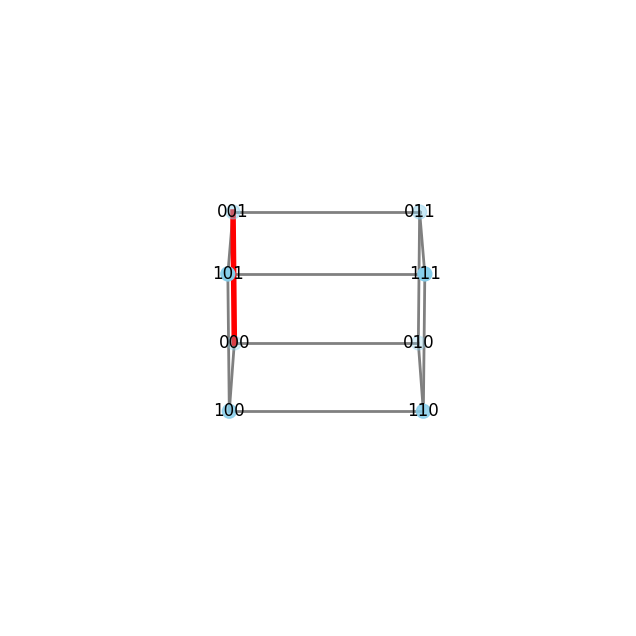

In [6]:
# Paso 1: Importar las bibliotecas necesarias
import networkx as nx
import matplotlib.pyplot as plt
from itertools import permutations
import time
from matplotlib import animation
from IPython.display import HTML
import numpy as np
from google.colab import files  # Si estás en Google Colab

# Paso 2: Crear el grafo cúbico
G = nx.Graph()

# Definir los vértices (cadenas binarias de longitud 3)
V = ['000', '001', '010', '011', '100', '101', '110', '111']
G.add_nodes_from(V)

# Definir las aristas (diferencia en una posición)
E = [('000', '001'), ('000', '010'), ('000', '100'),
     ('001', '011'), ('001', '101'),
     ('010', '011'), ('010', '110'),
     ('100', '101'), ('100', '110'),
     ('011', '111'), ('101', '111'), ('110', '111')]
G.add_edges_from(E)

# Generar posiciones para un dibujo en 3D
pos_3d = {
    '000': (0, 0, 0),
    '001': (0, 0, 1),
    '010': (0, 1, 0),
    '011': (0, 1, 1),
    '100': (1, 0, 0),
    '101': (1, 0, 1),
    '110': (1, 1, 0),
    '111': (1, 1, 1)
}

# Crear la figura y el eje 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Función para dibujar el grafo cúbico
def draw_cube(ax, G, pos, highlighted_edges=None, angle=0):
    ax.clear()
    # Establecer el ángulo de visualización
    ax.view_init(elev=20, azim=angle)
    # Dibujar aristas
    for edge in G.edges():
        x = [pos[edge[0]][0], pos[edge[1]][0]]
        y = [pos[edge[0]][1], pos[edge[1]][1]]
        z = [pos[edge[0]][2], pos[edge[1]][2]]
        ax.plot(x, y, z, color='gray', linewidth=2)

    # Resaltar aristas del ciclo Hamiltoniano
    if highlighted_edges:
        for edge in highlighted_edges:
            x = [pos[edge[0]][0], pos[edge[1]][0]]
            y = [pos[edge[0]][1], pos[edge[1]][1]]
            z = [pos[edge[0]][2], pos[edge[1]][2]]
            ax.plot(x, y, z, color='red', linewidth=4)

    # Dibujar nodos
    xs = [pos[node][0] for node in G.nodes()]
    ys = [pos[node][1] for node in G.nodes()]
    zs = [pos[node][2] for node in G.nodes()]
    ax.scatter(xs, ys, zs, color='skyblue', s=100)

    # Etiquetas de los nodos
    for node in G.nodes():
        x, y, z = pos[node]
        ax.text(x, y, z, node, fontsize=12, ha='center', va='center')

    # Configurar los límites de los ejes
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_zlim(-0.5, 1.5)

    # Remover los ejes
    ax.set_axis_off()

# Obtener un ciclo Hamiltoniano utilizando fuerza bruta
def get_hamiltonian_cycle(G):
    nodes = list(G.nodes())
    start = nodes[0]  # Fijar el nodo de inicio
    other_nodes = nodes[1:]

    for perm in permutations(other_nodes):
        cycle = [start] + list(perm) + [start]
        valid = True
        for i in range(len(cycle) - 1):
            if not G.has_edge(cycle[i], cycle[i+1]):
                valid = False
                break
        if valid:
            return cycle  # Retorna el primer ciclo Hamiltoniano encontrado
    return None

# Obtener un ciclo Hamiltoniano
hamiltonian_cycle = get_hamiltonian_cycle(G)

if hamiltonian_cycle:
    print("Ciclo Hamiltoniano encontrado:")
    print(hamiltonian_cycle)
else:
    print("No se encontró un ciclo Hamiltoniano.")

# Preparar las aristas del ciclo Hamiltoniano para la animación
edges_in_cycle = []
for i in range(len(hamiltonian_cycle) - 1):
    edges_in_cycle.append((hamiltonian_cycle[i], hamiltonian_cycle[i+1]))

# Función de actualización para la animación
def update(num, edges_in_cycle):
    # Calcular el ángulo de rotación
    angle = num * 4  # Ajusta este valor para cambiar la velocidad de rotación
    # Resaltar las aristas hasta el paso actual
    current_edges = edges_in_cycle[:min(num+1, len(edges_in_cycle))]
    draw_cube(ax, G, pos_3d, highlighted_edges=current_edges, angle=angle)
    return ax,

# Número total de cuadros (ajusta según la velocidad deseada)
total_frames = len(edges_in_cycle) + 90  # 90 cuadros adicionales para completar la rotación

# Crear la animación
ani = animation.FuncAnimation(fig, update, frames=total_frames, fargs=(edges_in_cycle,),
                              interval=200, blit=False)

# Guardar la animación como GIF
ani.save('ciclo_hamiltoniano_hipercubo.gif', writer='pillow', fps=5)

print("Animación guardada como 'ciclo_hamiltoniano_hipercubo.gif'.")

# Descargar el archivo GIF
files.download('ciclo_hamiltoniano_hipercubo.gif')
